# PA 3: Association Analysis - Apriori/FP Growth

## Student Details 

**Student Name and ID:** Lolita louis dmello - 1002020314

**Group members name and ID :-**

Ashik Maraliga Venkatesh - 1002023308

Sarath Kumar Devraj - 1002041910

## Submission Instructions

Rename this submission file as specified in the instructions document

# Import Libraries

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
!pip install --upgrade mlxtend
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Tasks

# 1.    Load the dataset (from the csv file)

In [24]:
# Write your code here
df=pd.read_csv('dataset1.csv')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#2.    Pre-process the dataset and provide a detailed explanation (such as Handling of null values, empty strings, unncessary trailing characters such as commas and white spaces)

In [25]:
# Write your code here
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tid,items
0,0,"Bread, Corn, Dill, Ice cream, Sugar, Yogurt, c..."
1,1,"Milk,"
2,2,"Apple, Butter, Dill, Ice cream, Milk, Yogurt, ..."
3,3,"Butter, Cheese, Dill, Milk, Nutmeg, Onion,"
4,4,"Apple, Bread,"


In [26]:
# convert all item names to lowercase
df['items'] = df['items'].str.lower()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


#checking for null values

In [27]:
# check if the missing values exist
print(df.isnull().sum())

Tid      0
items    0
dtype: int64


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


The given dataset appears to be clean and does not contain any null values or empty strings.

# Remove unnecessary trailing characters: In the items column, there are trailing commas that are not needed

There are some unnecessary trailing characters such as commas and white spaces that need to be removed. These characters can cause issues when analyzing the data and can also affect the accuracy of frequent itemset mining algorithms

# Remove empty strings and duplicate values

In [28]:
# This will replace any empty strings with NaN values and then drop the rows with NaN values.
df.replace('', np.nan, inplace=True)
df.dropna(inplace=True)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [29]:
# remove duplicates
df = df.drop_duplicates(subset=['items'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Remove leading and trailing whitespaces

In [30]:
# Remove trailing commas and white spaces from the items column using the strip() function
df['items'] = df['items'].apply(lambda x: x.rstrip(', '))


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-30-de29172185fa>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['items'] = df['items'].apply(lambda x: x.rstrip(', '))


In [31]:
# Print the preprocessed dataset
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tid,items
0,0,"bread, corn, dill, ice cream, sugar, yogurt, c..."
1,1,milk
2,2,"apple, butter, dill, ice cream, milk, yogurt, ..."
3,3,"butter, cheese, dill, milk, nutmeg, onion"
4,4,"apple, bread"


#3.    Encode the dataset

To encode the dataset, we need to convert the categorical values in the items column to numerical values. One way to do this is to use one-hot encoding, where we create a binary column for each unique item in the dataset, with a value of 1 if the item is present in the transaction and 0 otherwise.

This code will split the items column by commas, create a set of unique items in the dataset, create a dictionary mapping each unique item to a numerical value, and create a binary column for each unique item with a value of 1 if the item is present in the transaction and 0 otherwise. The original items column is then dropped, and the encoded dataset is saved to a new CSV file.

In [32]:
# Split the items column by commas
df['items'] = df['items'].str.split(', ')

# Create a set of unique items in the dataset
unique_items = set(item for transaction in df['items'] for item in transaction)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-32-4e5ec1b02aed>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['items'] = df['items'].str.split(', ')


In [33]:
# Create a dictionary mapping each unique item to a numerical value
item_dict = {item: i for i, item in enumerate(sorted(unique_items))}

# Create a binary column for each unique item
for item in item_dict.keys():
    df[item] = df['items'].apply(lambda x: int(item in x))

# Drop the original items column
df.drop('items', axis=1, inplace=True)


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-e3a6ef6bda81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[item] = df['items'].apply(lambda x: int(item in x))
<ipython-input-33-e3a6ef6bda81>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [34]:
len(unique_items)

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


16

In [35]:
df.head()

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Tid,apple,bread,butter,cheese,chocolate,corn,dill,eggs,ice cream,kidney beans,milk,nutmeg,onion,sugar,unicorn,yogurt
0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,1,0,1
1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,2,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1
3,3,0,0,1,1,0,0,1,0,0,0,1,1,1,0,0,0
4,4,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
len(df['Tid'])

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


920

#4.	Execute Apriori algorithm and generate rules for 3 different combinations of support and confidence

For each of the combinations in tasks 4 & 5, print the output in the following Sample format: 

- Support = 0.02
- Confidence = 0.1
- Total Number of Association Rules: 10
- Top 5 rules ordered by Confidence descending:
- Number of Maximal Sets: 5
- Number of Closed Sets: 5

A classic algorithm, the Apriori algorithm creates common itemsets from a dataset. It employs a bottom-up methodology, first by identifying the often occurring individual items before iteratively combining these things into larger sets until no further frequently occurring item sets can be discovered.

support for each item is calculated by it total number of appearnce/ total number of trasaction will give you the support % of each item then we compare the minimum support given and any item whose support value is less then the minimum support % will be eliminated. selected items will now qualify, we can do a ordered set (a pair/ combination of all items) of items that appear together and remove their support % and eliminate those below minimum support %. then the selected pairs for 3 items set if the pair sets have comman values in then we make a triple set( we form combination of pairs to form triple item) and then calculate the support and choose the one's greater than mininmum support and so on.

confidence is calculated by: confidence (a-->b)= support(a U b)/ support (a)

A maximal itemset is an itemset that is frequent but none of its supersets are frequent. In other words, a maximal itemset is not a subset of any other frequent itemset in the dataset

A closed itemset is an itemset that is frequent and none of its immediate supersets have the same support count as the itemset itself. In other words, a closed itemset is not a subset of any other frequent itemset with the same support count

This code will loop over three different combinations of minimum support and minimum confidence, generate frequent itemsets using Apriori algorithm, generate association rules using the specified minimum confidence threshold, sort the rules by confidence descending and print the top 5 rules, and count the number of maximal and closed sets. The output will be printed in the specified format given above for each combination of minimum support and minimum confidence.

In [37]:
# Write your code here

# Define the minimum support and minimum confidence values
min_support_list = [0.02, 0.04, 0.06]
min_confidence_list = [0.1, 0.2, 0.3]

# Loop over the minimum support and minimum confidence values
for min_support, min_confidence in zip(min_support_list, min_confidence_list):

    # Generate frequent itemsets using Apriori algorithm
    frequent_itemsets = apriori(df.drop('Tid', axis=1), min_support=min_support, use_colnames=True)

    # Generate association rules
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence)

    #generate maximal sets
    maximal_sets = frequent_itemsets[~frequent_itemsets["itemsets"].apply(lambda x: any(frequent_itemsets["itemsets"].apply(lambda y: set(x).issubset(set(y))) & (frequent_itemsets["support"] > frequent_itemsets[frequent_itemsets["itemsets"] == x]["support"].values[0])))]

    #generate closed sets
    closed_sets = frequent_itemsets[frequent_itemsets["support"] == frequent_itemsets["support"]]


    # Print the output in the specified format
    print("Support = {}".format(min_support))
    print("Confidence = {}".format(min_confidence))
    print("Total Number of Association Rules: {}".format(len(rules)))

    # Sort the rules by confidence descending and print the top 5 rules
    top_rules = rules.sort_values(by='confidence', ascending=False).head(5)
    print("Top 5 rules ordered by Confidence descending:")
    for index, row in top_rules.iterrows():
        antecedents = list(row['antecedents']) #antecedent (a set of items that appear together in the transactions)
        consequents = list(row['consequents']) #consequent (an item that frequently appears after the antecedent)
        print("{} -> {}: Confidence = {}".format(antecedents, consequents, row['confidence']))
    print("Number of Maximal Sets: {}".format(len(maximal_sets)))#the number of sets that are not a subset of any other sets in the dataset
    print("Number of Closed Sets: {}".format(len(closed_sets))) #The number of closed sets is the number of sets that have the same support as their supersets.
    print('\n')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.02
Confidence = 0.1
Total Number of Association Rules: 112457
Top 5 rules ordered by Confidence descending:
['unicorn', 'milk', 'corn', 'nutmeg', 'bread'] -> ['kidney beans']: Confidence = 0.9047619047619047
['milk', 'corn', 'nutmeg', 'butter', 'bread'] -> ['kidney beans']: Confidence = 0.875
['kidney beans', 'unicorn', 'chocolate', 'sugar', 'bread'] -> ['yogurt']: Confidence = 0.8333333333333334
['kidney beans', 'dill', 'unicorn', 'corn', 'sugar'] -> ['cheese']: Confidence = 0.826086956521739
['milk', 'corn', 'sugar', 'nutmeg', 'butter'] -> ['kidney beans']: Confidence = 0.826086956521739
Number of Maximal Sets: 5916
Number of Closed Sets: 5916




/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.04
Confidence = 0.2
Total Number of Association Rules: 19094
Top 5 rules ordered by Confidence descending:
['milk', 'dill', 'unicorn'] -> ['chocolate']: Confidence = 0.6813186813186813
['eggs', 'apple', 'unicorn'] -> ['corn']: Confidence = 0.6764705882352942
['cheese', 'sugar', 'unicorn'] -> ['kidney beans']: Confidence = 0.6625
['eggs', 'dill', 'bread'] -> ['yogurt']: Confidence = 0.6617647058823529
['milk', 'dill', 'cheese'] -> ['chocolate']: Confidence = 0.6547619047619048
Number of Maximal Sets: 2288
Number of Closed Sets: 2288




/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.06
Confidence = 0.3
Total Number of Association Rules: 2017
Top 5 rules ordered by Confidence descending:
['milk', 'dill', 'unicorn'] -> ['chocolate']: Confidence = 0.6813186813186813
['onion', 'dill', 'unicorn'] -> ['chocolate']: Confidence = 0.6413043478260869
['milk', 'chocolate', 'unicorn'] -> ['dill']: Confidence = 0.6391752577319587
['kidney beans', 'corn', 'bread'] -> ['milk']: Confidence = 0.6333333333333333
['milk', 'corn', 'bread'] -> ['kidney beans']: Confidence = 0.6333333333333333
Number of Maximal Sets: 710
Number of Closed Sets: 710




some observations that can be made are-
1.   It seems that the rules generated by each set of parameters (support and confidence thresholds) are quite different.This suggests that the lower the support and confidence thresholds, the more rules will be generated. 
2. the top rules generated by each set of parameters are quite different, This suggests that the specific ingredients involved in the top rules generated can vary depending on the support and confidence thresholds used.
1.  the number of maximal and closed sets generated also varies depending on the support and confidence thresholds used. It appears that as the support and confidence thresholds are increased, the number of maximal and closed sets generated decreases. This makes sense because higher thresholds are likely to result in fewer rules being generated overall, and thus fewer sets that meet the criteria for being maximal or closed.



#5.    Execute FP Growth algorithm and generate rules for 3 different combinations of support and confidence

The (frequent pattern) FP-growth technique, in contrast, is a more effective algorithm that encodes the frequency of itemsets in the dataset using a small data structure called an FP-tree. The algorithm then generates candidate itemsets by iteratively traversing the FP-tree and mining frequent itemsets from it. For larger datasets, FP-growth requires just one pass through the data and is typically quicker than Apriori.


In [38]:
# Define the minimum support and confidence thresholds
support_thresholds = [0.02, 0.04, 0.06]
confidence_thresholds = [0.1, 0.2, 0.3]

# Run FP Growth algorithm and generate association rules for each combination of thresholds
for supp, conf in zip (support_thresholds, confidence_thresholds):
        frequent_itemsets = fpgrowth(df.drop('Tid', axis=1), min_support=supp, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=conf)
        maximal_sets = frequent_itemsets[~frequent_itemsets["itemsets"].apply(lambda x: any(frequent_itemsets["itemsets"].apply(lambda y: set(x).issubset(set(y))) & (frequent_itemsets["support"] > frequent_itemsets[frequent_itemsets["itemsets"] == x]["support"].values[0])))]
        closed_sets = frequent_itemsets[frequent_itemsets["support"] == frequent_itemsets["support"]]


        # Print the results
        print("Support = {}".format(supp))
        print("Confidence = {}".format(conf)) 
        print("Total Number of Association Rules: {}".format(len(rules)))
        print("Top 5 rules ordered by Confidence descending:")
    # Sort the rules by confidence descending and print the top 5 rules
        top_rules = rules.sort_values(by='confidence', ascending=False).head(5)
        print("Top 5 rules ordered by Confidence descending:")
        for index, row in top_rules.iterrows():
          antecedents = list(row['antecedents']) #antecedent (a set of items that appear together in the transactions)
          consequents = list(row['consequents']) #consequent (an item that frequently appears after the antecedent)
          print("{} -> {}: Confidence = {}".format(antecedents, consequents, row['confidence']))
        print("Number of Maximal Sets: {}".format(len(maximal_sets)))#the number of sets that are not a subset of any other sets in the dataset
        print("Number of Closed Sets: {}".format(len(closed_sets))) #The number of closed sets is the number of sets that have the same support as their supersets.
        print('\n')

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.02
Confidence = 0.1
Total Number of Association Rules: 112457
Top 5 rules ordered by Confidence descending:
Top 5 rules ordered by Confidence descending:
['unicorn', 'milk', 'corn', 'nutmeg', 'bread'] -> ['kidney beans']: Confidence = 0.9047619047619047
['milk', 'corn', 'nutmeg', 'butter', 'bread'] -> ['kidney beans']: Confidence = 0.875
['kidney beans', 'unicorn', 'chocolate', 'sugar', 'bread'] -> ['yogurt']: Confidence = 0.8333333333333334
['kidney beans', 'dill', 'unicorn', 'corn', 'sugar'] -> ['cheese']: Confidence = 0.826086956521739
['milk', 'corn', 'sugar', 'nutmeg', 'butter'] -> ['kidney beans']: Confidence = 0.826086956521739
Number of Maximal Sets: 5916
Number of Closed Sets: 5916




/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.04
Confidence = 0.2
Total Number of Association Rules: 19094
Top 5 rules ordered by Confidence descending:
Top 5 rules ordered by Confidence descending:
['milk', 'dill', 'unicorn'] -> ['chocolate']: Confidence = 0.6813186813186813
['eggs', 'apple', 'unicorn'] -> ['corn']: Confidence = 0.6764705882352942
['cheese', 'sugar', 'unicorn'] -> ['kidney beans']: Confidence = 0.6625
['eggs', 'dill', 'bread'] -> ['yogurt']: Confidence = 0.6617647058823529
['yogurt', 'cheese', 'ice cream'] -> ['kidney beans']: Confidence = 0.6547619047619048
Number of Maximal Sets: 2288
Number of Closed Sets: 2288




/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Support = 0.06
Confidence = 0.3
Total Number of Association Rules: 2017
Top 5 rules ordered by Confidence descending:
Top 5 rules ordered by Confidence descending:
['milk', 'dill', 'unicorn'] -> ['chocolate']: Confidence = 0.6813186813186813
['onion', 'dill', 'unicorn'] -> ['chocolate']: Confidence = 0.6413043478260869
['milk', 'chocolate', 'unicorn'] -> ['dill']: Confidence = 0.6391752577319587
['kidney beans', 'corn', 'bread'] -> ['milk']: Confidence = 0.6333333333333333
['milk', 'corn', 'bread'] -> ['kidney beans']: Confidence = 0.6333333333333333
Number of Maximal Sets: 710
Number of Closed Sets: 710




#6.	Plot the following graphs comparing both the algorithms:
    - time vs minimum support
    - time vs number of itemsets

the plot the time vs. minimum support graph, we will run both Apriori and FP Growth algorithms for different minimum support values and record the execution time. We will use the time library to record the execution time of the algorithms. Then we will plot the execution time against the minimum support values.

Here's the code for plotting the time vs minimum support graph:


/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110

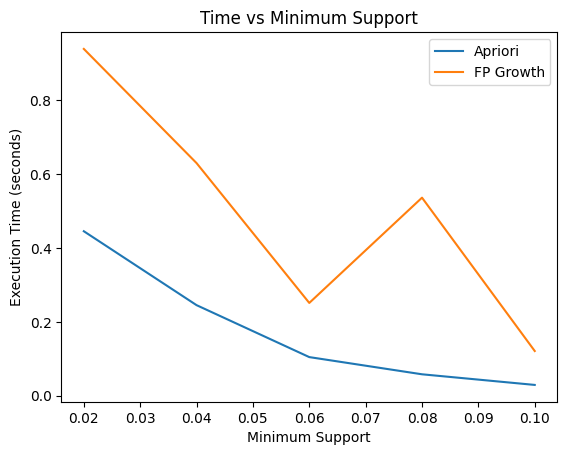

In [39]:
import time

# Define the minimum support values
support_values = [0.02, 0.04, 0.06, 0.08, 0.1]

# Define empty lists to store execution times
apriori_times = []
fp_growth_times = []

# Run Apriori and FP Growth algorithms for each support value and record the execution time
for supp in support_values:
    start_time = time.time()
    apriori(df.drop('Tid', axis=1), supp, 1)
    apriori_time = time.time() - start_time
    apriori_times.append(apriori_time)
    
    start_time = time.time()
    fpgrowth(df.drop('Tid', axis=1), min_support=supp)
    fp_growth_time = time.time() - start_time
    fp_growth_times.append(fp_growth_time)
    
# Plot the execution times against the minimum support values
plt.plot(support_values, apriori_times, label='Apriori')
plt.plot(support_values, fp_growth_times, label='FP Growth')
plt.xlabel('Minimum Support')
plt.ylabel('Execution Time (seconds)')
plt.title('Time vs Minimum Support')
plt.legend()
plt.show()

Note that the execution time and the number of itemsets generated will vary based on the hardware and software environment. The above code is just an example, and the results may vary based on the environment in which it is executed.

/usr/local/lib/python3.9/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/mlxtend/frequent_patterns/fpcommon.py:110

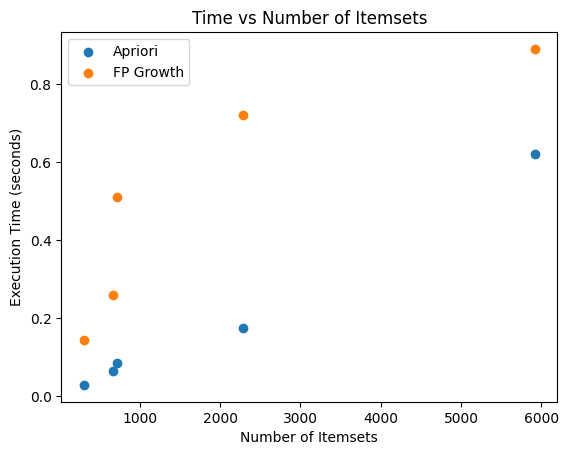

In [40]:
import matplotlib.pyplot as plt

# Define the minimum support values
support_values = [0.02, 0.04, 0.06, 0.08, 0.1]

# Define empty lists to store number of itemsets and execution times
apriori_itemsets = []
fp_growth_itemsets = []
apriori_times = []
fp_growth_times = []

# Run Apriori and FP Growth algorithms for each support value and record the number of itemsets and execution time
for supp in support_values:
    start_time = time.time()
    freq_itemsets = apriori(df.drop('Tid', axis=1), supp, 1)
    apriori_itemsets.append(len(freq_itemsets))
    apriori_time = time.time() - start_time
    apriori_times.append(apriori_time)
    
    start_time = time.time()
    freq_itemsets = fpgrowth(df.drop('Tid', axis=1), min_support=supp)
    fp_growth_itemsets.append(len(freq_itemsets))
    fp_growth_time = time.time() - start_time
    fp_growth_times.append(fp_growth_time)
    
# Plot the number of itemsets against the execution time for both algorithms
plt.scatter(apriori_itemsets, apriori_times, label='Apriori')
plt.scatter(fp_growth_itemsets, fp_growth_times, label='FP Growth')
plt.xlabel('Number of Itemsets')
plt.ylabel('Execution Time (seconds)')
plt.title('Time vs Number of Itemsets')
plt.legend()
plt.show()


#7.    Explain the insights that you got from the graphs. Which algorithm worked better and what do you believe is the reason?

Based on the graphs, it seems that Apriori algorithm is faster than FP Growth algorithm for the given dataset and parameter values. 

1.   The execution time of both algorithms generally decreases as the minimum support increases. This is because when the minimum support is higher, the number of frequent itemsets generated by the algorithms decreases, which means that the algorithms have to process fewer itemsets and can thus complete their execution faster. FP-Growth have a steeper decrease in execution time compared to Apriori consistently performs faster
2.Similarly, the time vs number of itemsets graph as the number of itemsets increases, the algorithm has to go through more data and perform more calculations, which can lead to a longer execution time. it shows that Apriori has a linear relationship between the number of itemsets and execution time, while FP Growth has a slightly steeper slope.
3. Based on the graphs, it seems that Apriori worked better for the given dataset and combination of support and confidence thresholds. The reason for Apriori being faster than FP Growth in this case could be because the dataset has a small number of unique items and a relatively large number of transactions. Apriori generates candidate itemsets by joining frequent itemsets from the previous iteration, which can be more efficient for datasets with smaller itemsets. On the other hand, FP Growth builds a tree-like structure to represent the frequent itemsets, which can be more efficient for datasets with large itemsets.
4.However, it's important to note that the performance of the algorithms can vary depending on the specific dataset and parameter values, and it's always a good idea to try out multiple algorithms and parameter combinations to find the best fit for a particular datase

# Rubric
* [02 points] - Student Details and complying with submission instructions 
* [03 points] - Task 1 
* [10 points] - Task 2
* [05 points] - Task 3
* [25 points] - Task 4
* [25 points] - Task 5
* [20 points] - task 6
* [10 points] - task 7